<a href="https://colab.research.google.com/github/swapnilzambare/EDA-Airbnb-Data-Analysis-Capstone-Project/blob/main/Team_Colab_EDA_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **1. Acquire and loading data**

# **Load python libraries**

In [ ]:
# Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load dataset**

In [ ]:
# Mounting drive for import csv file data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing csv file of Airbnb NYC 2019 from drive
airbnb= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of Airbnb NYC 2019.csv")

In [ ]:
# Check file
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **Understanding data**
**After we load the dataset, we need to understand the dataset by using various techniques. First, we need to look for information on how big is our dataset. By using shape attributes, we get to know our data size from a number of rows which consist of listing index, and the number of columns with the content of every features related to the index.**

In [ ]:
# Shape of airbnb data which shows number of rows and columns
airbnb.shape

(48895, 16)

**Then we check all the data type of every column if it already matches our requirement. For instance, we need a numerical data type (integer and float) on the longitude and latitude, for listing names we need to make sure the data is using string/object data type.**

In [ ]:
# Data type
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**We found out that our dataset has 48895 listings in 16 catogorical data. The features include listing name, host id, location information, location coordinate, room type, the price per night, and so on.**

In [ ]:
# Checking info non- null and data type
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Descriptive statistics summary
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Next, we look up all the unique values of the ‘neighbourhood_group’ that is consists of a list of all the New York region.**
**From list below we understand that New York is divided in 5 neighbourhood group**.

In [ ]:
# Neighbourhood group in New York
ngg=airbnb['neighbourhood_group'].unique()
print('Neighbourhood Group =',list(ngg))

Neighbourhood Group = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']


In [ ]:
# Neighbourhood group are further divided in neighbourhood 
# Checking total neighbourhood and print them
ng=airbnb['neighbourhood'].unique()
print('Total neighbourhood =',len(ng))
print('Neighbourhood =',list(ng))

Total neighbourhood = 221
Neighbourhood = ['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', 'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'South Slope', 'West Village', 'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side', 'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay', 'SoHo', 'Upper East Side', 'Prospect Heights', 'Washington Heights', 'Woodside', 'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill', 'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George', 'Highbridge', 'Financial District', 'Ridgewood', 'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo', 'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island', 'Greenwich Village', 'Little Italy', 'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point', 'Eastchester', 'Kingsbridge', 'Two Bridges', 'Q

**The region area is divided further by the Airbnb into 221 areas called 'neighbourhood' areas for booking purposes. We will use the ‘neighbourhood’ columns to look at which region that has the Airbnb listing.**

In [ ]:
# Room type that Airbnb provides
rt=airbnb['room_type'].unique()
print('Room Type =',list(rt))

Room Type = ['Private room', 'Entire home/apt', 'Shared room']


**From the list above, we see that Airbnb have room type. Based on the information on the Airbnb website, the definition of each room type are:**
## *   **Private room** ✈
**Guests have exclusive access to the bedroom/sleeping area of the listing. Other parts area such as the living room, kitchen, and bathroom are likely open either to the host even to other guests**.
## *   **Entire home/apt** ✈
**Guests have the whole place for themselves. It usually includes a bedroom, bathroom, and kitchen**.
## *   **Shared Room** ✈
**Guests sleep in a bedroom or a common area that could be shared with others.**

# **2. Cleaning dataset**

# **Checking column with missing values**

In [ ]:
# Let’s check first if there are any missing values within our dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# **Removing redundant variables**
**In our case, the missing values that are observed do not need too much treatment. Looking into our dataset, we can state columns ‘id' and ‘host_name’, ‘last_review’ are irrelevant and unethical for further data exploration analysis. Therefore, we can get rid of those columns.**

In [ ]:
# Removing redundant variable
airbnb.drop(['id','host_name','last_review'],axis=1,inplace=True)
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# **Replacing all the missing values**
**Next, we need to replace all the missing values in the ‘review_per_month’ and 'price' column with 0 (zero) to make sure the missing values do not interfere with our analysis**

In [ ]:
# Fill NAN values with zero
airbnb['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
# Fill NAN values with zero
airbnb['price'].fillna(0,inplace=True)

# **Finding Outliers**

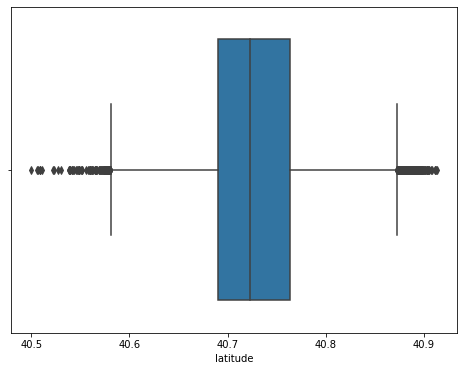

In [ ]:
# Outliers present in latitude
plt.figure(figsize=(8,6))
sns.boxplot(x='latitude',data = airbnb)
plt.show()

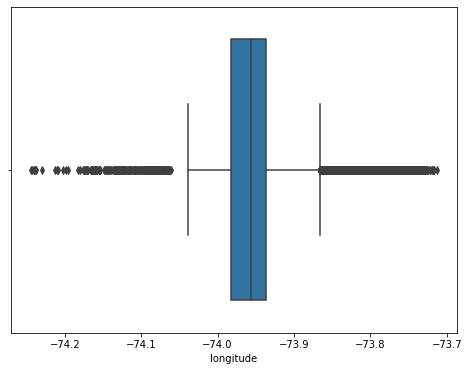

In [ ]:
# Outliers present in longitude
plt.figure(figsize=(8,6))
sns.boxplot(x='longitude',data = airbnb)
plt.show()

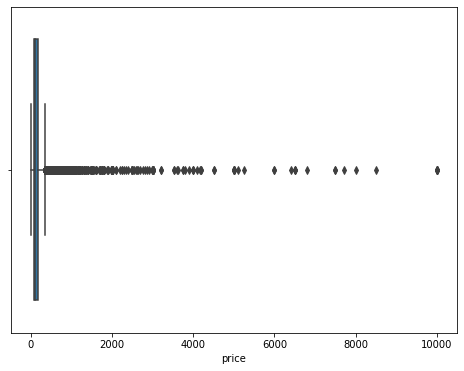

In [ ]:
# Outliers present in price
plt.figure(figsize=(8,6))
sns.boxplot(x='price',data = airbnb)
plt.show()

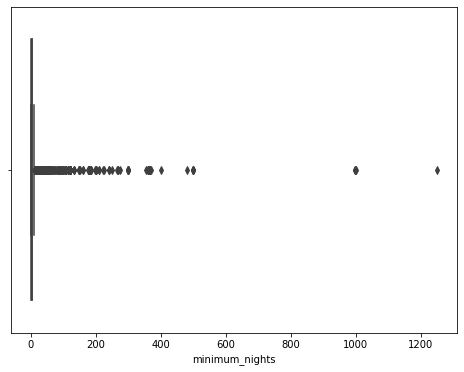

In [ ]:
# Outliers present in minimum_nights
plt.figure(figsize=(8,6))
sns.boxplot(x='minimum_nights',data = airbnb)
plt.show()

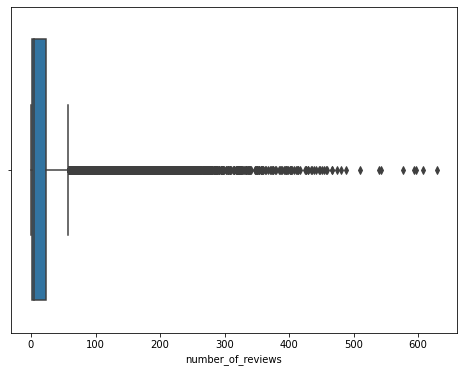

In [ ]:
# Outliers present in number_of_reviews
plt.figure(figsize=(8,6))
sns.boxplot(x='number_of_reviews',data = airbnb)
plt.show()

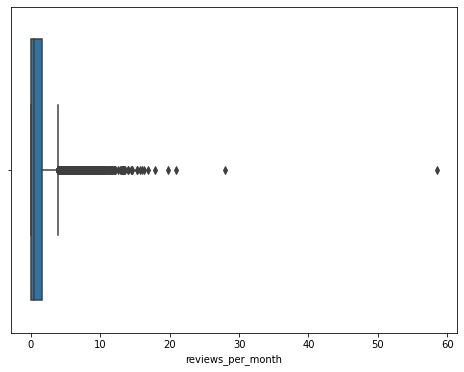

In [ ]:
# Outliers present in reviews_per_month
plt.figure(figsize=(8,6))
sns.boxplot(x='reviews_per_month',data = airbnb)
plt.show()

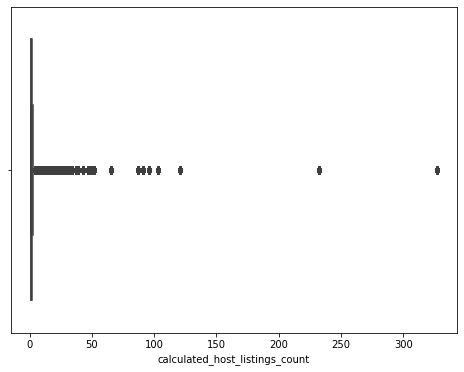

In [ ]:
# Outliers present in calculated_host_listings_count
plt.figure(figsize=(8,6))
sns.boxplot(x='calculated_host_listings_count',data = airbnb)
plt.show()

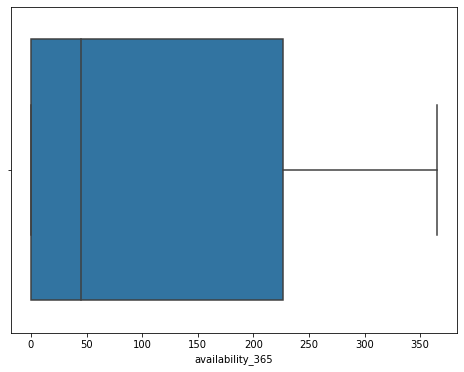

In [ ]:
# Outliers present in availability_365
plt.figure(figsize=(8,6))
sns.boxplot(x='availability_365',data = airbnb)
plt.show()

# **3. Exploring and visualizing data**

# **Top listing counts**


In [ ]:
# Accessing the initial values given in dataset
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# Accessing the last reported values in given dataset. It also provides total entries in data which is about 48895
airbnb.tail()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,Trendy duplex in the very heart of Hell's Kitchen,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


**First, we skip the first column of ‘name’ and begin from the ‘host_id’ column. Then we slice the top 10 hosts in terms of listing count**

In [ ]:
# Listing the Top host id and their booking
top_host_id = airbnb['host_id'].value_counts().head(10)
print('Total of top 10 hosts =',top_host_id.sum())
top_host_id.to_frame()

Total of top 10 hosts = 1270


,host_id
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
12243051,96
61391963,91
22541573,87
200380610,65
7503643,52


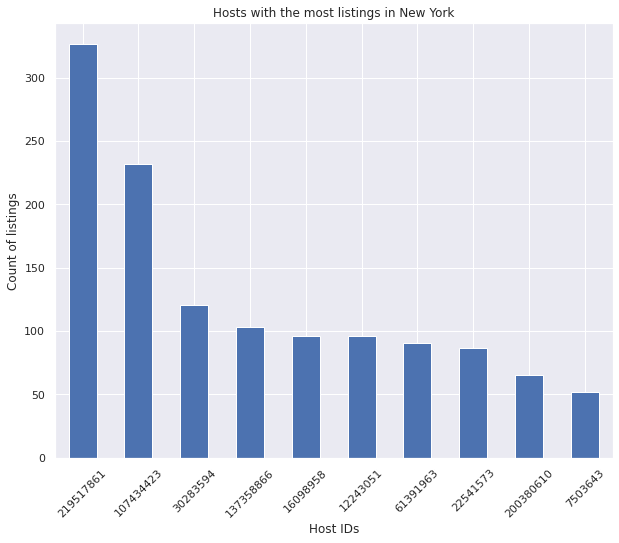

In [ ]:
# Plotting bar graph of top 10 hosts with their total listings
viz_bar = top_host_id.plot(kind='bar')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_title('Hosts with the most listings in New York')
sns.set(rc={'figure.figsize':(10,8)})

**From the chart above, we can see the total of top 10 hosts is almost 2%( 1270 listings) of the whole dataset (48895 listings). Even one of the hosts has more than 325 listings!**

# **Top Neighbourhood Group**

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


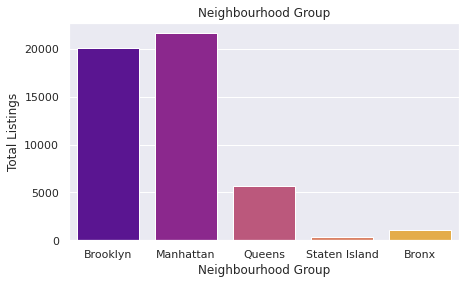

In [ ]:
# Plotting Graph of Neighbourhood group and their total number of listings
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(7,4)
plt.title('Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Listings')
print(airbnb.neighbourhood_group.value_counts())

**As we can see from the graph maximum listing is from Manhattan (21661 listing) neighbourhood group while staten island has very less listing counts only 373 listing**.

# **Top Neighbourhood**

**Next, we look up the top 10 neighbourhood areas that have the highest number of listings**

In [ ]:
# Top 10 listing in neighbourhood
top10=airbnb['neighbourhood'].value_counts().head(10).to_frame()
top10

,neighbourhood
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564
Midtown,1545


**As we can see, Williamsburg  has the highest number of listings 3920.**

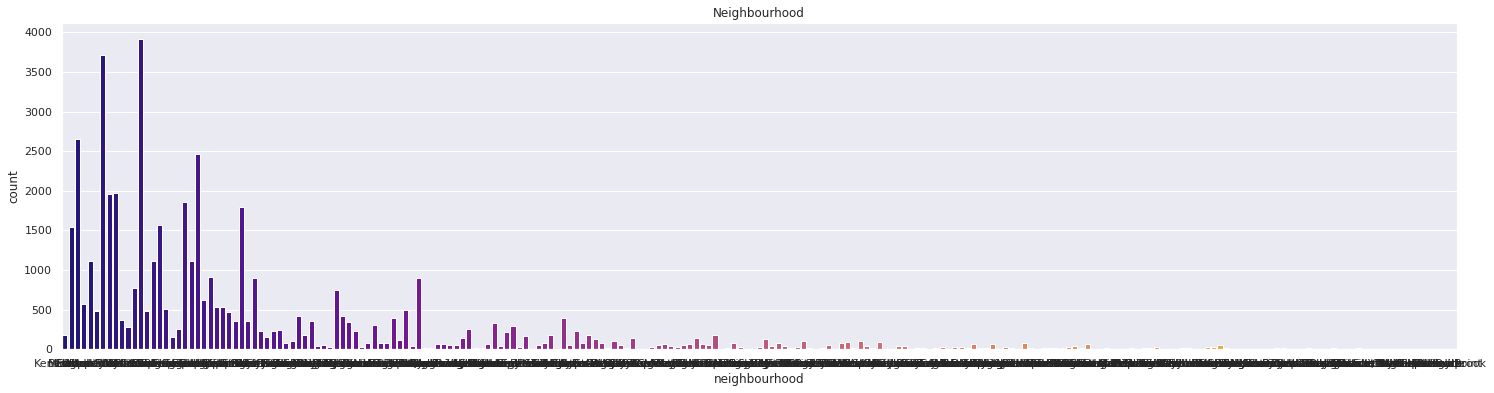

In [ ]:
# Plotting neighbourhood listing countplot
sns.countplot(airbnb['neighbourhood'], palette="plasma")
plt.title('Neighbourhood')
fig = plt.gcf()
fig.set_size_inches(25,6)

# **Top Region Area**

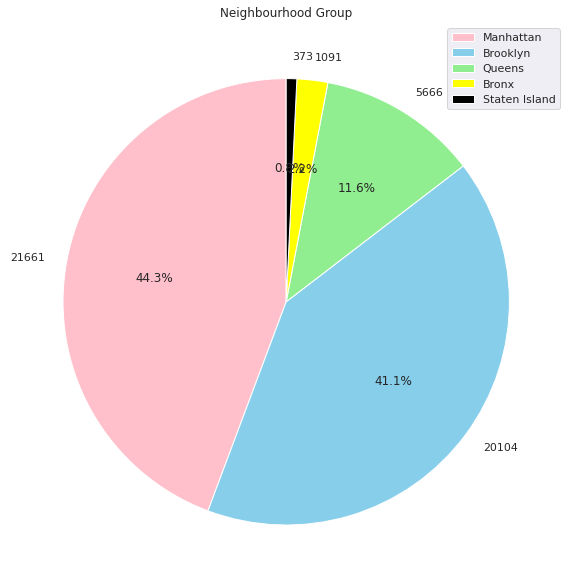

In [ ]:
# Plotting Pie chart which gives percentage and total listings of neighbourhood group
labels = airbnb.neighbourhood_group.value_counts().index
colors = ['pink','skyblue','lightgreen','yellow','black']
explode = (0,0,0,0,0)
shape = airbnb.neighbourhood_group.value_counts().values
plt.figure(figsize=(10,15))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

**From the chart above, we see the Manhattan has the most listings with almost 21661 listings number, covering more than 44.3% of the total listings. Which was followed by Brooklyn with 20104 listing covering about 41% of total listing**

# **Listing Map**
**From the data below, we can see the outer values of longitude and latitude from the min and max index**.

In [ ]:
coord = airbnb.loc[:,['longitude','latitude']]
coord.describe()

,longitude,latitude
count,48895.000000,48895.000000
mean,-73.952170,40.728949
std,0.046157,0.054530
min,-74.244420,40.499790
25%,-73.983070,40.690100
50%,-73.955680,40.723070
75%,-73.936275,40.763115
max,-73.712990,40.913060


**Next, we visualize the scatter plot map of every listing and 'Neighbourhood group' it by color on each different region**

,neighbourhood_group
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


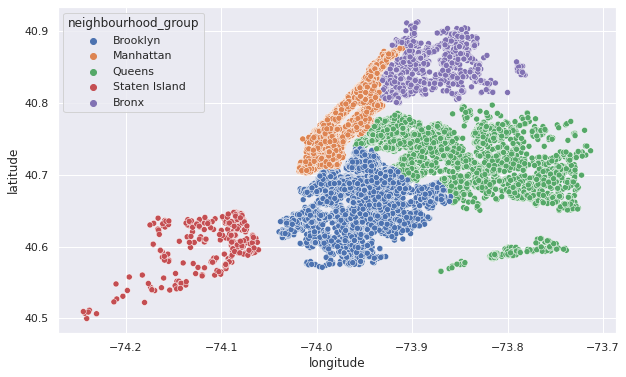

In [ ]:
# Map of neighbourhood group showing density of listings through scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()
airbnb.neighbourhood_group.value_counts().to_frame()



**From the map above, we can see clearly where the densest listing is located, shown by the orange colour which is area of Manhattan region is the densest while area shown in red scatter plot is of Staten Island has very less density of listing**.

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

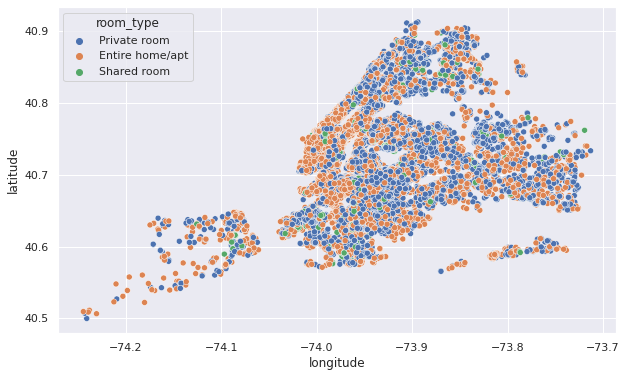

In [ ]:
# Room type listings in New York
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()
airbnb['room_type'].value_counts()

**From above scatter plot it has seen that people mostly prefer Entire Home/apt (25409 listings) which gives them more privacy and more roaming area than a shared room. Also we can see that all types off room are available in throughout the neighbourhood group.**.

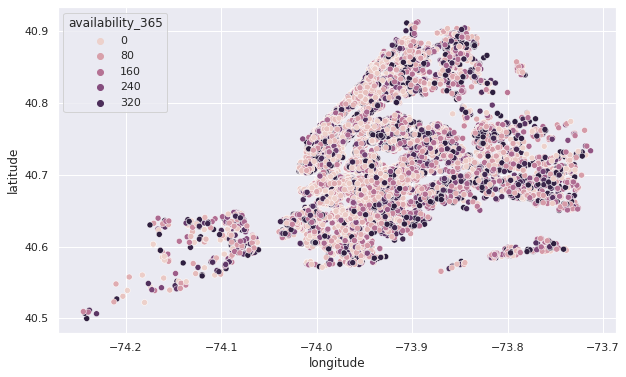

In [ ]:
# Room availability
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

**From above scatter plot we can see that faintly plotted area wich is mostly in Manhattan has less room availability during 365 days. As people are mostly prefer these areas for bookings.**

# **Price Distribution**

**Price distribution will help in analysing peoples demand in which area they mostly prefer and what price they can afford.**



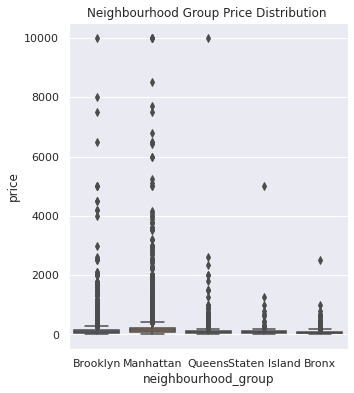

In [ ]:
# Boxplot of price distribution in Neighbourhood Group
plt.figure(figsize=(5,6))
sns.boxplot(y='price',x='neighbourhood_group',data = airbnb)
plt.title('Neighbourhood Group Price Distribution ')
plt.show()

**From the graph above at some of the place there is very high price per night about $ 10000 as seen in the Manhattan and Brooklyn region. We also consider it as an outliers.**

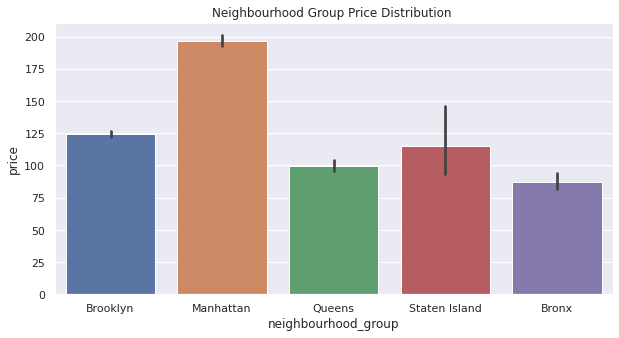

In [ ]:
# Barplot of price distribution shows average price in Neighbourhood Group
plt.figure(figsize=(10,5))
sns.barplot(y='price',x='neighbourhood_group',data = airbnb)
plt.title('Neighbourhood Group Price Distribution ')
plt.show()

**From the data above, we see the Manhattan Region has the most expensive price per night with a median $ 195 as it follows law of economics of demand and supply**.

# **Availability of Room**

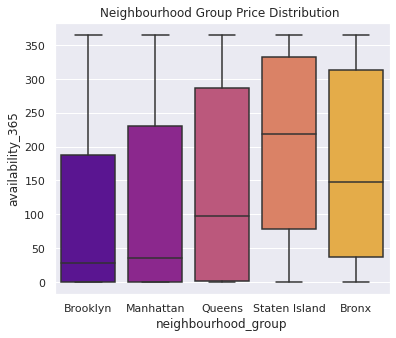

In [ ]:
# Relation between neighbourhood group and Availability of Room
plt.figure(figsize=(6,5))
plt.title('Neighbourhood Group Price Distribution ')
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')


**From the above box plot Brooklyn and Manhattan region is most busy region as there is very less availability of room while in Staten Island there is more than average 200 days rooms are available as people are less prefer than other region.**

# **Top 10 most reviewed listings**

**We will find out the top 10 listings based on their number of reviews to know the most popular Airbnb listings in New York.**

In [ ]:
# Top 10 listing based on number of reviews
airbnb.nlargest(10, 'number_of_reviews')

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


# **Visualising Room Type count in Neighbourhood Group** 

In [ ]:
# Counting total numbers of room type in neighbourhood group
a=airbnb.groupby('neighbourhood_group')['room_type'].value_counts()
a

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

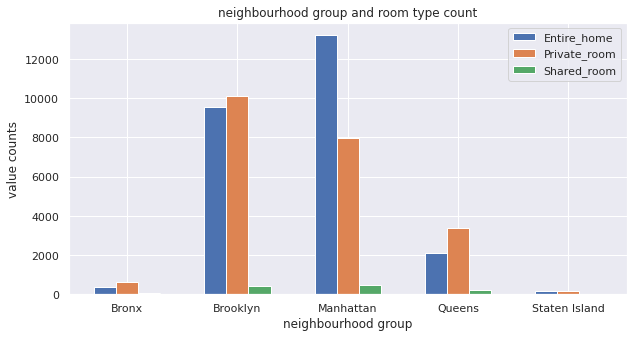

In [ ]:
# Plotting multibar graph of neighbourhood group and room type count
from matplotlib import pyplot as plt
import numpy as np

neighbourhood_group = ['Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
Entire_home=[379,9559,13199,2096,176]
Private_room=[652,10132,7982,3372,188]
Shared_room=[60,413,480,198,9]
w=0.2
plt.figure(figsize=(10,5))
Entire_home_bar=np.arange(len(neighbourhood_group))
Private_room_bar=[i+w for i in Entire_home_bar]
Shared_room_bar=[i+w for i in Private_room_bar]


plt.bar(Entire_home_bar,Entire_home,width=w,label='Entire_home')
plt.bar(Private_room_bar,Private_room,width=w,label='Private_room')
plt.bar(Shared_room_bar,Shared_room,width=w,label='Shared_room')

plt.xticks(Entire_home_bar+w,neighbourhood_group)
plt.ylabel('value counts')
plt.xlabel('neighbourhood group')
plt.title('neighbourhood group and room type count')
plt.legend()
plt.show()

**From the above bar graph we can say that maximum room type count is of Entire Home or apartment. Also maximum availability is in Manhattan while very less in Staten Island region**

# **Visualising Neighbourhood Group and Room Type with Average Price.**

In [ ]:
# Calculating average price of room type in neighbourhood group
aa=airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean()
aa

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

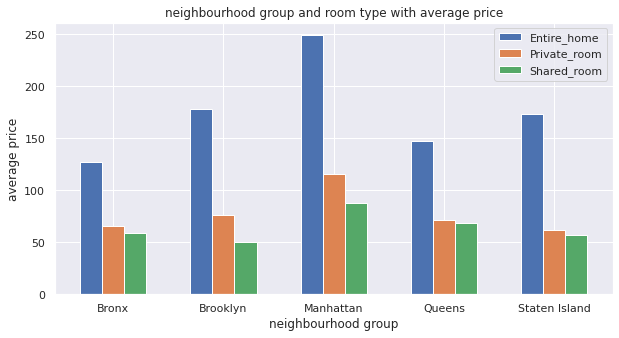

In [ ]:
# Plotting multibar graph of average price of room type in neighbourhood group
from matplotlib import pyplot as plt
import numpy as np

neighbourhood_group = ['Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
Entire_home=[127,178,249,147,173]
Private_room=[66,76,116,71,62]
Shared_room=[59,50,88,69,57]
w=0.2
plt.figure(figsize=(10,5))
Entire_home_bar=np.arange(len(neighbourhood_group))
Private_room_bar=[i+w for i in Entire_home_bar]
Shared_room_bar=[i+w for i in Private_room_bar]


plt.bar(Entire_home_bar,Entire_home,width=w,label='Entire_home')
plt.bar(Private_room_bar,Private_room,width=w,label='Private_room')
plt.bar(Shared_room_bar,Shared_room,width=w,label='Shared_room')

plt.xticks(Entire_home_bar+w,neighbourhood_group)
plt.ylabel('average price')
plt.xlabel('neighbourhood group')
plt.title('neighbourhood group and room type with average price')
plt.legend()
plt.show()

**From above graph we have seen that the average price of all type of room type is more in Manhattan than any other region.**

# **Average price per night**

In [ ]:
# Average price per night of top reviewed listings
price_avg = airbnb.nlargest(100, 'number_of_reviews').price.mean()
print('Average price per night of top rewiewd listings: {}'.format(price_avg))

Average price per night of top rewiewd listings: 95.53


In [ ]:
# Average price in New York region
print('Average Price in New York =',airbnb.price.mean())

Average Price in New York = 152.7206871868289


**From above we can say that people are mostly prefer the cheap price rooms as we has seen that the average price of top 100 most reviewed listings is much less than total average price.**

# **Correlation matrix**

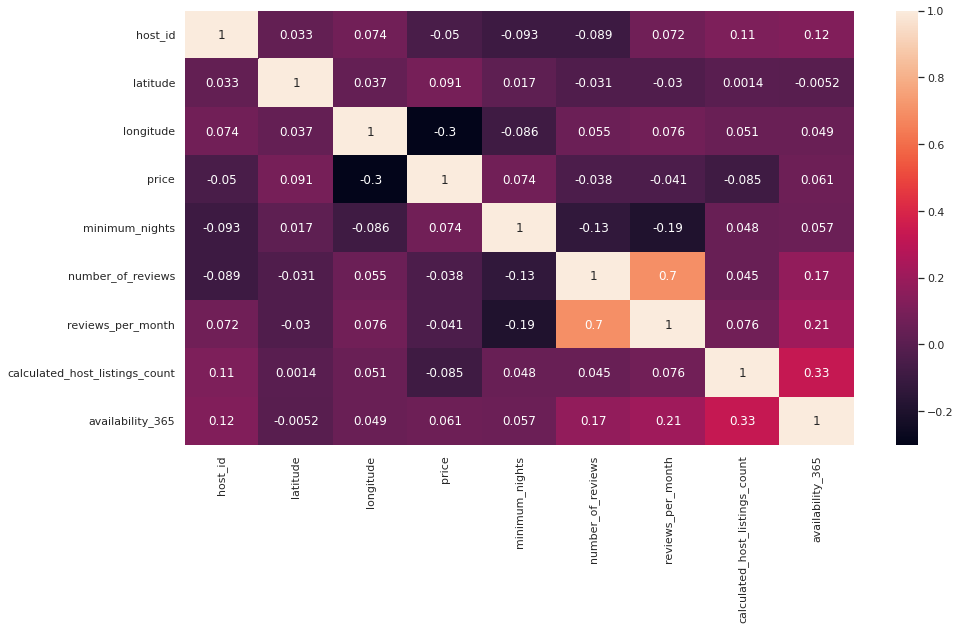

In [ ]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

**From above Correlation Matrix we can see that there is highest correlation is between 'Number of Reviews' and 'Reviews per Month'.**

# **Conclusion**
 **Simply by performing EDA on the dataset, we’ve identified various new insight on how the Airbnb listings distributed on New York, we know where are the listings located, found out the Manhattan is dominating the listing number and have the highest price range, how the listing price might be related to the number of bookings and room availability. Also we have found that people mostly
choose the room where they are available at cheap rate and giving them more privacy and roaming area as they prefer Entire home or apartment for rental purpose than shared ones**.
1. **The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only**.
2. **The people who prefer to stay in Private room they won’t stay longer as compared to Home or Apartment**.
3. **Most people prefer to pay less price**.
4. **If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place**.